## importing required libraries

In [1]:
from matplotlib.pyplot import figure                           
import pandas as pd                                            
import matplotlib.pyplot as plt                                
import numpy as np                
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

## Building a wrange function to read the dataset, wrangle it and prepare it for analysis

In [18]:

# Build your `wrangle` function
def wrangle(self,filepath):
    # Read CSV file into DataFrame
    df = pd.read_csv(filepath)
    # drop columns with high null or NaN counts
    df.drop(columns=['body','boat','cabin','home.dest'], inplace=True)
    # droping columns which have no effect on the target output which is survived
    df.drop(columns = ['name','embarked','ticket','parch','sibsp'], inplace=True)
    # using linear interpolation to fill NaN values in numerical data columns
    df = df.interpolate(method ='linear', limit_direction ='forward')
    # converting the categorical value into numerical values i.e from male and female to 1 or 0
    le = LabelEncoder()
    df['encoded_sex'] = le.fit_transform(df['sex'])

    return df


## Now, lets display the final dataframe which is ready for analysis

In [3]:
Titanic_df = wrangle("titanic3.csv")
Titanic_df

,pclass,survived,sex,age,fare,encoded_sex
0,1,1,female,29.00,211.3375,0
1,1,1,male,0.92,151.5500,1
2,1,0,female,2.00,151.5500,0
3,1,0,male,30.00,151.5500,1
4,1,0,female,25.00,151.5500,0
...,...,...,...,...,...,...
1304,3,0,female,14.50,14.4542,0
1305,3,0,female,20.50,14.4542,0
1306,3,0,male,26.50,7.2250,1
1307,3,0,male,27.00,7.2250,1


## Then let look on the correlation coeffients between the variables in data frame

In [4]:
# correlation coefficient matrix
correlation_coeff = Titanic_df.corr()
correlation_coeff

,pclass,survived,age,fare,encoded_sex
pclass,1.000000,-0.312469,-0.407895,-0.558741,0.124617
survived,-0.312469,1.000000,-0.041658,0.244479,-0.528693
age,-0.407895,-0.041658,1.000000,0.176876,0.057729
fare,-0.558741,0.244479,0.176876,1.000000,-0.185745
encoded_sex,0.124617,-0.528693,0.057729,-0.185745,1.000000


<AxesSubplot:>

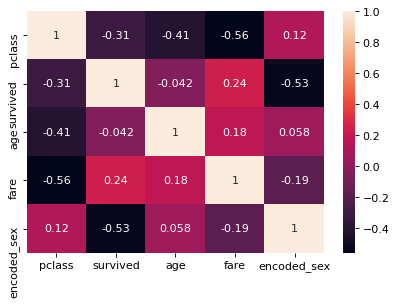

In [5]:
# Heatmap of the correlation coefficient matrix
# setting the size of the correlation heat map
figure(figsize=(6, 4), dpi=80)
# generating the heap map of the correlation matrix
sns.heatmap(correlation_coeff, annot=True)   

From the heatmap above, it seems like pclass and encoded_sex (sex) are highly correlated with the survived than other variables.
This is means that pclass and Sex columns affect more the target output which is survived. According to the result from the heatmap above, it shows that the age is weakly correlated to the target output(survived).

## Finding the probability of survival for a passenger on the titanic

Building Prob_passenger function that will return a table giving survival probabilities broken down by passenger class, gender, and age.

In [6]:
def Prob_passenger(df):
    # calculating the surviving probability
    Prob_Survived = len(df[df['survived']==1]) / len(df)
    # Calculating the survival probability per class
       # Class1
    Class1 = df[df['pclass']==1]
    Survive_Prob_Class1 = len(Class1[Class1['survived']==1]) / len(Class1) 
       # Class2
    Class2 = df[df['pclass']==2]
    Survive_Prob_Class2 = len(Class2[Class2['survived']==1]) / len(Class2)
      # Class3
    Class3 = df[df['pclass']==3]
    Survive_Prob_Class3 = len(Class3[Class3['survived']==1]) / len(Class3)
    
    # Calculating the survival probabilities per sex or gend
      # Starting for Male
    Male = df[df['sex']=='male']
    Prob_Male_Survival = len(Male[Male['survived']==1]) / len(Male)
      # Then for Female
    Female = df[df['sex']=='female']
    Prob_Female_Survival = len(Female[Female['survived']==1]) / len(Female)
    
    # Calculating the survival probabilities per age group
     # For age less than 30 years
    Age_less30 = df[df['age']<=30]
    Prob_Age_less30 = len(Age_less30[Age_less30['survived']==1]) / len(Age_less30)

       # for age greater than 30 but less than 60 years
    Age_less60 = df[(df['age']>30) & (df['age']<=60) ]
    Prob_Age_less60 = len(Age_less60[Age_less60['survived']==1]) / len(Age_less60)

        # for age greater than 60 years
    Age_greater60 = df[df['age']>60]
    Prob_Age_greater60 = len(Age_greater60[Age_greater60['survived']==1]) / len(Age_greater60)
    
    # creating a dictionary of probabilitie
    table = {'female':[Prob_Female_Survival], 'male':[Prob_Male_Survival], 'class1':[Survive_Prob_Class1],
        'class2':[Survive_Prob_Class2], 'class3':[Survive_Prob_Class3], 'age<=30':[Prob_Age_less30],
        '30<age<=60':[Prob_Age_less60], 'age>60':[Prob_Age_greater60]}

    ## creating a dataframe of the dictionary to be able to print the table
    df = pd.DataFrame(table)
    
    return df
    

### Now call the function and pass in dataframe and returns the passenger probabilities based on sex, class and age

In [7]:
Prob_passenger(Titanic_df)

,female,male,class1,class2,class3,age<=30,30<age<=60,age>60
0,0.727468,0.190985,0.619195,0.429603,0.255289,0.38163,0.39243,0.235294


From the table above, we can all see that female were more likely to survive than males. Males had less chances to survive.In addition, passengers in class1 were more likely to survive than passengers in class2 and than passengers in class3. we can observe that the class of passengers affect the survival of the passenger too. for ages, we see than passengers who had ages greater than 60 had less chance to survive compared to passengers with ages less than 60. 

## Building Random Forest model for the dataset to predict the target

### First, lets separate predictor variables and target variable

In [20]:
X = Titanic_df.drop(columns=['survived','sex'])
y = Titanic_df['survived']

## Building Random_Forest function that will return the accuracies of the model and the confusion matrix graph

In [13]:
def Random_Forest(X,y):
    # split X and y into training and testing sets
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
    # Instationing the random forest classifier
    Rf_Classifier = RandomForestClassifier(n_estimators = 80, min_samples_leaf=3,max_leaf_nodes = 80, max_depth=3, n_jobs=-1)
    # fit the model
    Rf_Classifier.fit(X_train,y_train)
    # generate predictions
    Rf_prediction = Rf_Classifier.predict(X_test)
    
    # Now lets use Metrics to calculate the accuracies
    Rf_conf_matrix = confusion_matrix(y_test,Rf_prediction)
    
    ## Now let's use Classification Report to generate the accuracies
    Rf_c_report = classification_report(y_test,Rf_prediction,output_dict=True)
    Rf_precision = Rf_c_report['weighted avg']['precision']
    Rf_recall = Rf_c_report['weighted avg']['recall']
    Rf_f1score = Rf_c_report['weighted avg']['f1-score']
    
    # Ploting the confusion matrix
    fig, ax = plt.subplots(figsize = (4,4))
    ax.matshow(Rf_conf_matrix, cmap = plt.cm.Greens, alpha = 0.5)
    for i in range(Rf_conf_matrix.shape[0]):
        for j in range(Rf_conf_matrix.shape[1]):
            ax.text(x = j, y = i, s = Rf_conf_matrix[i, j],)

    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix')
    plt.show()

    return (f"Precision:{Rf_precision:.3f}\nRecall:{Rf_recall:.3f}\nf1-score:{Rf_f1score:.3f}"), Rf_conf_matrix


### Now call the function and pass in parameters and returns the confusion matrix graph and the accuracies (precision, recall and f1-score) 

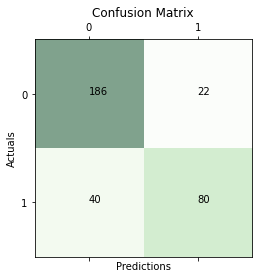

('Precision:0.809\nRecall:0.811\nf1-score:0.807',
 array([[186,  22],
        [ 40,  80]], dtype=int64))

In [15]:
Random_Forest(X,y)

From the confusion matrix, we can see the TP(True Positive) is 186 and TN(True Negative) is 80, FP(False Positive) is 22 and FN(False Negative) is 40 when our model is given unseen data (test data). Normaly, the accuracy is calculated as (TP+TN) / (TP+TN+FP+FN) and in this case will be (186+80)/(186+80+22+40) = 0.8109 same as Recall obtained. That is how the confusion matrix help us to calculate the accuracy of the model after prediction. The accuracy in this case explains how well we managed to predict the unseen data comparing to the true values. Therefore, for this model, we are sure that around 81 percent for each prediction of survival in titanic the passenger survived or died. The model accuracy is 81 percent.

# Now lets build another model to compare to Random Forest Classifier

## Building a logistic regression model for survival rates based on passenger class, sex, and age.

Building Logistic_Regression function that will return confusion matrix of the logistic regression model and accuracies (precision, recall and f1-score)

In [11]:
def Logistic_Regression(X,y):
    # split X and y into training and testing sets
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
   # instantiate the model (using the default parameters)
    logreg = LogisticRegression()
    # fit the model with data
    logreg.fit(X_train,y_train)
    # generate predictions
    y_pred = logreg.predict(X_test)
    # Confusion matrix
    Conf_Matrix = confusion_matrix(y_test,y_pred)
    
    # Ploting the confusion matrix
    fig, ax = plt.subplots(figsize = (4,4))
    ax.matshow(Conf_Matrix, cmap = plt.cm.Greens, alpha = 0.5)
    for i in range(Conf_Matrix.shape[0]):
        for j in range(Conf_Matrix.shape[1]):
            ax.text(x = j, y = i, s = Conf_Matrix[i, j],)

    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix')
    plt.show()
    
    ## Now let's use Classification Report to generate the accuracies
    Log_cls_report = classification_report(y_test,y_pred,output_dict=True)
    Log_precision = Log_cls_report['weighted avg']['precision']
    Log_recall = Log_cls_report['weighted avg']['recall']
    Log_f1score = Log_cls_report['weighted avg']['f1-score']
    
    return (f"Precision:{Log_precision:.3f}\nRecall:{Log_recall:.3f}\nf1-score:{Log_f1score:.3f}"), Conf_Matrix
    

### Now call the function and pass in parameters and returns the confusion matrix graph and the accuracies (precision, recall and f1-score) 

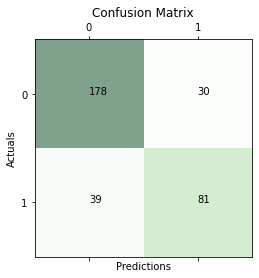

('Precision:0.787\nRecall:0.790\nf1-score:0.788',
 array([[178,  30],
        [ 39,  81]], dtype=int64))

In [12]:
Logistic_Regression(X,y)

From the confusion matrix, we can see the TP(True Positive) is 178 and TN(True Negative) is 81, FP(False Positive) is 30 and FN(False Negative) is 39 when our model is given unseen data (test data). Normaly, the accuracy is calculated as (TP+TN) / (TP+TN+FP+FN) and in this case will be (178+81)/(178+81+30+39) = 0.7896 same as Recall obtained. That is how the confusion matrix help us to calculate the accuracy of the model after prediction. The accuracy in this case explains how well we managed to predict the unseen data comparing to the true values. Therefore, for this model, we are sure that around 79 percent for each prediction of survival in titanic the passenger survived or died. The model accuracy is 79 percent.

### Therefore, compared to Logistic Regression, Random Forest Classifier is more accurate than Logistic Regression model
### It gives the accuracy which is 2percent higher than the accuracy obtained from Logistic Regression model for this project.